## Group members: Siri Strøm, Petrea Norgren, Manfred Clase

### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [4]:
import pandas as pd

df=pd.read_csv("prostate.data",sep="\t")
df.drop("Unnamed: 0",axis=1, inplace=True)
df.drop("train",axis=1, inplace=True)
print(df.head())

     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:             #Checks if figsize is given as a parameter
        figsize = (7.10, 6.70)      #Initalizes a default figsize if no argument is given
    n_vars = df.shape[1]            #Saves the number of predictors as a variable n_vars
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) #initalizes the figure as a square matrix (n_vars x n_vars) 
                                                                        #of subplots
    plt.subplots_adjust(            #Fixes the layout of the subplots
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):         #itarate over the rows of the plot matrix
        for j in range(n_vars):     #itarate over the cols of the plot matrix
            axij = ax[i][j]         #saves placement of current subplot
            i_name = df.columns[i]  #gets name of predictor for X axis
            j_name = df.columns[j]  #gets name of predictor for Y axis
            axij.set_xticks([])     
            axij.set_yticks([])
            axij.margins(0.1)
        if i != j:              #Checks if index i does not equal j, 
                                #if so: plots predictor with index j as a function of the predictor with index i               
                axij.scatter(df[i_name], df[j_name], s=10)
            else:               #if not plots name of predictor with index i = j. 
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax           #returns the figure                   

fig, ax = pairplot(df)
plt.show()                  #prints the figure
```

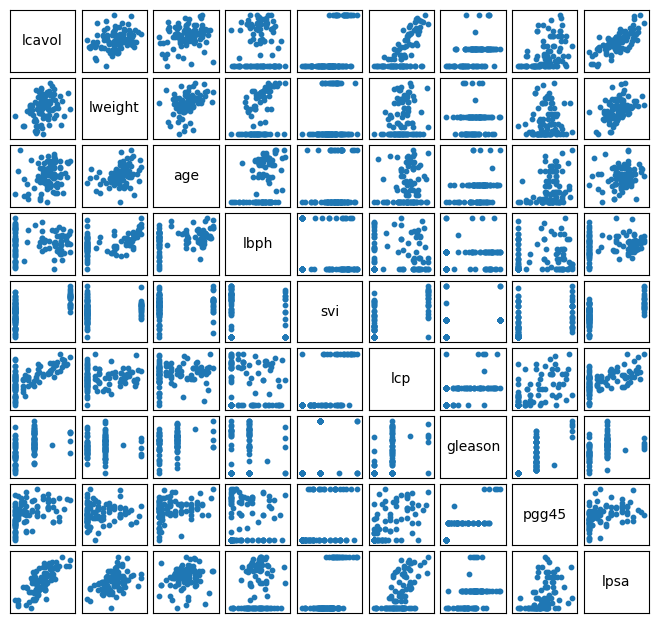

In [5]:

# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:             
        figsize = (7.10, 6.70)      
    n_vars = df.shape[1]            
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) 
    plt.subplots_adjust(           
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):         
        for j in range(n_vars):     
            axij = ax[i][j]         
            i_name = df.columns[i]  
            j_name = df.columns[j] 
            axij.set_xticks([])     
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:             
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                                horizontalalignment='center',
                                verticalalignment='center',
                                transform = axij.transAxes)        
    return fig, ax                      

fig, ax = pairplot(df)
plt.show()                  


**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

Based on the plot we would say `lpsa` is the most correlated, another variable that seems corrlated is the `lcp` aswell as the `svi`.From the plots it seems as though all predictors are qualitative/contonous except `svi` and `gleason`.

In [6]:
print(f"{'Variable': <20}{'Type':<20}")
for col in df.columns:
    print(f"{col :<20}{str(df[col].dtypes) :<20}")


Variable            Type                
lcavol              float64             
lweight             float64             
age                 int64               
lbph                float64             
svi                 int64               
lcp                 float64             
gleason             int64               
pgg45               int64               
lpsa                float64             


**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

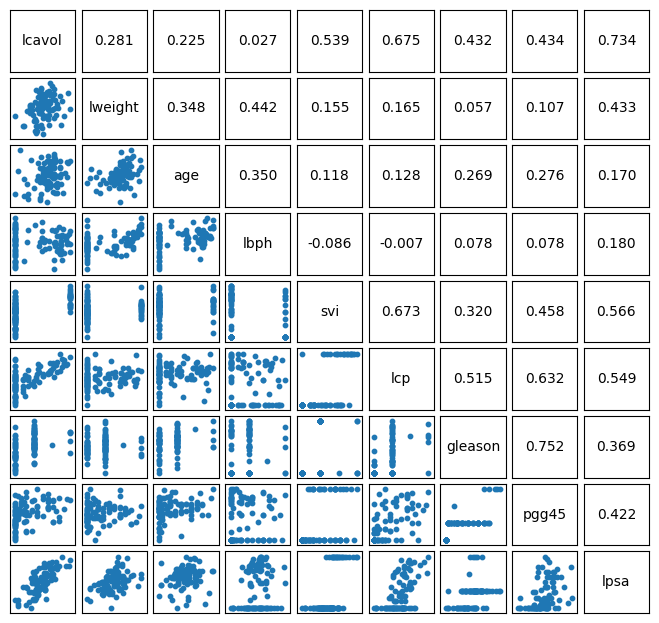

In [7]:
def corr_np(X,Y):
    x_mean = X.mean()                       #Calculates the mean of the input vector X
    y_mean = Y.mean()                       #Calculates the mean of the input vector Y
    c_xy = ((X-x_mean)*(Y-y_mean)).mean()   #approximation of the covariance between X and Y
    s_x_2 = ((X-x_mean)**2).mean()          #approximation of the variance of X
    s_y_2 = ((Y-y_mean)**2).mean()          #approximation of the variance of Y
    return c_xy/((s_x_2*s_y_2)**0.5) 


def pairplot(df, figsize=None):
    if figsize is None:             
        figsize = (7.10, 6.70)      
    n_vars = df.shape[1]            
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) 
    plt.subplots_adjust(         
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):         
        for j in range(n_vars):     
            axij = ax[i][j]         
            i_name = df.columns[i]  
            j_name = df.columns[j]  
            axij.set_xticks([])     
            axij.set_yticks([])
            axij.margins(0.1)
            if i < j:
                axij.text(0.5, 0.5, f"{(corr_np(df[i_name], df[j_name])):.3f}", fontsize=10,
                                horizontalalignment='center',
                                verticalalignment='center',
                                transform = axij.transAxes)
            elif i != j:           
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                                horizontalalignment='center',
                                verticalalignment='center',
                                transform = axij.transAxes)        
    return fig, ax                        

fig, ax = pairplot(df)
plt.show()               

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

In [8]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

\begin{align*}
    X &= \begin{bmatrix}
        1 &  lweight_1 & age_1	& lbph_1 &svi_1	&lcp_1	&gleason_1	&pgg45_1 &lpsa_1	\\
        \vdots & \vdots & \vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots\\
         1 &  lweight_N & age_N	& lbph_N &svi_N	&lcp_N	&gleason_N	&pgg45_N &lpsa_N
    \end{bmatrix}
    &\hat{\beta}= \begin{bmatrix}
        \hat{\beta_0}\\
        \vdots\\
        \hat{\beta_8}
    \end{bmatrix}
   &Y = \begin{bmatrix}
        lcavol_1\\
        \vdots\\
        lcavol_N
    \end{bmatrix}
\end{align*}
 The regression model that we use to approximate $Y=X\beta+\varepsilon$ has the form: $\hat{Y} = X\hat{\beta}$. We want to find values for $\hat{\beta}$ st. the $MSE := \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_i})^2=\frac{1}{N}\sum_{i=1}^N(y_i-x_i\hat{\beta})^2$ is minimized. This is Achived by solving the equation
$X^TY = X^TX\hat{\beta}$.
\begin{align*}
    &X^TY = X^TX\hat{\beta} \iff \hat{\beta}=(X^TX)^{-1}X^TY \iff \hat{Y} = X(X^TX)^{-1}X^TY
\end{align*}

In the equations above $\varepsilon$ is a vector that contains the error of each observation i: $\varepsilon_i$, $\beta_0$ is the intercept and $\beta_1, ...,\beta_8$ is the coefficent that represents the expected change in the observation based on each predictor. 

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?

The default is a bool and we want to do linear regression, hence, we need it to be floats to do the matrix calculations (we want a single type and the other data is floats).

- Why did we drop two columns after the encoding?

We dropped one for each of the categorical predictors as the columns for each predictors would otherwise be linearly dependent which causes problems when we will try to take the inverse.
- Why did we add a column of ones to the dataframe?

To be able to add a constant to our final linear model, i.e to be able to include the intercept. 

In [9]:
import numpy as np
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64) 
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

print(X.columns)
print(y.name)

Index(['lweight', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'svi_1', 'gleason_7',
       'gleason_8', 'gleason_9', 'intercept'],
      dtype='str')
lcavol


**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.summary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

The `svi_1` line shows a coefficent of ≈-0.22 which means that the presence of `svi` seems to have a negative impact ("drag down") the value of the observation as compared to our base line (svi_0). For gleason our baseline is `gleason_6` and the coeffecints of `gleason_7` (≈0.3), `gleason_8`(≈_0.7) and `gleason_9` (≈0.8) respectively shows how the observation seem to be impacted by each one in realtaion to our baseline. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

The model would interpret the data not as categorical but as continous which would have been wrong.

- Comment the overall results of the regression as well.

The R-squared result is 0.686 which is moderately good and the adjusted R-squared result is quite close which suggests that the model may not be overfitted. The F-statistic of 18.83 suggest that it performes well in explaining a lot of the Variance in the dataset. Finally we can conclude by studiyng the `P>|t|` value that the predictors `age`, `lcp`, `pgg45`, `lpsa` are all statistically significant 


In [10]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
# print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        10:22:52   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.9

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [11]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


lweight, lbph, svi_1 and all gleason predictors all span 0 wich indicates there true value may be 0 and the predictor does not affect the observation. We can also see that the intervalls of age and pgg45 are quite small and so are their coeffients and hence we can assume these varibles do not have a large impact on the observations.

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.


Under the null Hypothesis (that lpsa does not effect the observation) we can see that the p-value (the probability of reciveing such an observation or something even greater in absolute value) is $\approx3*10^{-8}$ wich is well below our limit of 0.05. Hence we have support to reject this null hypothesis in favour of our alternative one: that `lpsa` does indeed effect the observations. The confidence intervall says that with 95\% certainty the correct value of the coefficent $\in$[0.370, 0.729]. We can see that this intervall does not cover the value 0. 

In [12]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [13]:
from scipy import stats


def get_beta(X, y):
    beta = np.linalg.solve(X.T @ X, X.T @ y)
    Z =np.linalg.solve(X.T @ X, np.eye(X.shape[1]))
    p = np.zeros(X.shape[1])
    T = np.zeros(X.shape[1])
    n = X.shape[0]
    simga2 = ((y - X @ beta)**2).sum()/(n - X.shape[1])
    for i in range(X.shape[1]):
        T[i] = beta[i]/((Z[i, i]*simga2)**0.5)
        if T[i] < 0:
            p[i] = 2*stats.t.cdf(T[i], n - X.shape[1])
        else:
            p[i] = 2*(1 - stats.t.cdf(T[i], n - X.shape[1]))
    return beta, T, p


beta, T, p = get_beta(X, y)
print(f"{'Predictors': <15}{'beta_x':<10}{'T-value':<10} {'p-value':<10}")
for v, b, t, p in zip(X.columns, beta, T, p):
    print(f"{v: <15}{round(b,4):<10}{t:<10.3f} {p:<10.4f}")



Predictors     beta_x    T-value    p-value   
lweight        -0.0112   -0.053     0.9577    
age            0.0248    2.205      0.0301    
lbph           -0.1042   -1.790     0.0770    
lcp            0.4028    4.734      0.0000    
pgg45          -0.0094   -2.080     0.0405    
lpsa           0.5496    6.100      0.0000    
svi_1          -0.2204   -0.860     0.3923    
gleason_7      0.3117    1.448      0.1513    
gleason_8      -0.7106   -0.936     0.3517    
gleason_9      0.7901    1.621      0.1087    
intercept      -1.4067   -1.609     0.1114    


**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

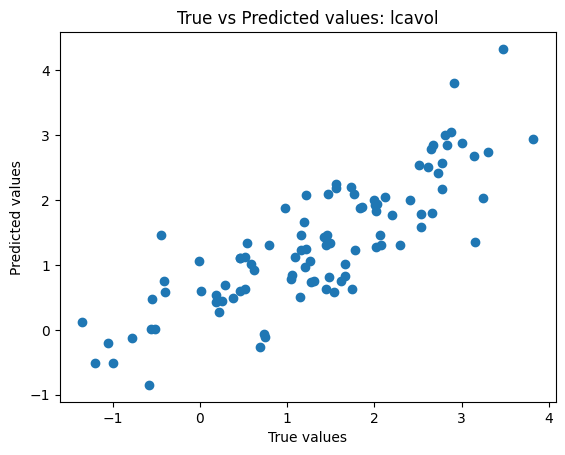

In [14]:
import matplotlib.pyplot as plt

y_hat = results.get_prediction(X).predicted_mean
plt.scatter(y, y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted values: lcavol")
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

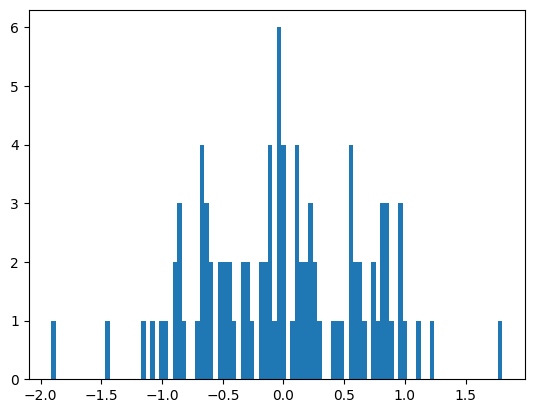

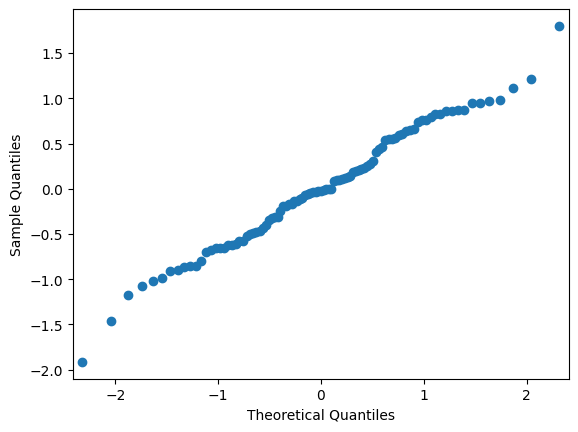

RSS:  41.81406860804535
Based on the histogram and the qqplot, the residuals seem to be normally distributed


In [15]:
import matplotlib.pyplot as plt

res = y - y_hat

plt.hist(res, bins=100)
sm.qqplot(res)
plt.show()

RSS = (res**2).sum()
print("RSS: ", RSS)
print("Based on the histogram and the qqplot, the residuals seem to be normally distributed")

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [ ]:
X = X.drop(columns=['lcavol', 'lpsa'])
model = sm.OLS(y, X)
results = model.fit()

y_hat = results.get_prediction(X).predicted_mean
plt.scatter(y, y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted values: lcavol")
plt.show()

res = y - y_hat
plt.hist(res, bins=100)
sm.qqplot(res)
plt.show()
RSS = (res**2).sum()
print("RSS: ", RSS)
print("Based on the histogram and the qqplot," 
" the residuals still seem to be normally distributed\n but with a larger variance than before.")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

Reducing the minimal RSS to compare models using a different number of predictors is inappropriate. This is because the RSS is mathematically guaranteed to decrease for every new predictor added to the model. For each new predictor the model will assign a small value to it since it will explain a small number of variance and therefore the RSS will decrease.

a)
Best combination of predictors:  ('lcp', 'lpsa')
RSS:  47.27809728978648
b)
k          Best Predictors                                                                  RSS       
0          ()                                                                               133.35903388922304
1          ('lpsa',)                                                                        61.42090741678992
2          ('lcp', 'lpsa')                                                                  47.27809728978648
3          ('age', 'lcp', 'lpsa')                                                           46.237825150928
4          ('age', 'lbph', 'lcp', 'lpsa')                                                   44.87840603234042
5          ('age', 'lbph', 'lcp', 'pgg45', 'lpsa')                                          44.311332487318964
6          ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_8')                             43.77602097098613
7          ('age', 'lbph', 'lcp', 'pgg45', 'lpsa

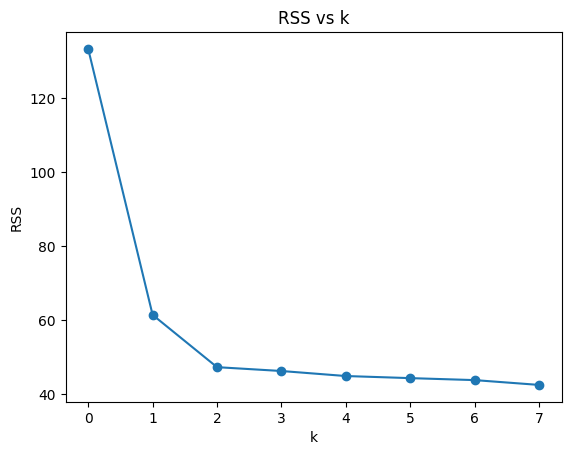

In [18]:
from itertools import combinations

combos = combinations(df_enc.columns.drop(["lcavol", "intercept"]), 2)

RSS = np.inf
best_combo = None

for combo in combos:
    X = df_enc[list(combo)]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    y_hat = results.get_prediction(X).predicted_mean
    res = y - y_hat
    RSS_combo = (res**2).sum()
    if RSS_combo < RSS:
        RSS = RSS_combo
        best_combo = combo

print("a)")
print("Best combination of predictors: ", best_combo)
print("RSS: ", RSS)


print("b)")
print(f"{'k': <10} {'Best Predictors':<80} {'RSS':<10}")
best_combos = {}
for k in range(8):
    combos = combinations(df_enc.columns.drop(["lcavol", "intercept"]), k)
    RSS = np.inf
    best_combo = None
    for combo in combos:
        X = df_enc[list(combo)]
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        y_hat = results.get_prediction(X).predicted_mean
        res = y - y_hat
        RSS_combo = (res**2).sum()
        if RSS_combo < RSS:
            RSS = RSS_combo
            best_combo = combo
    print(f"{k: <10} {str(best_combo):<80} {RSS:<10}")
    best_combos[k] = (best_combo, RSS)

plt.plot(best_combos.keys(), [best_combos[k][1] for k in best_combos], marker='o')
plt.xlabel("k") 
plt.ylabel("RSS") 
plt.title("RSS vs k") 
plt.show()

    

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

Split-validation is when a dataset is split into a Training and Validation, the Model fit/trains on the Training set and then evaluated on the Validation set. This enables us to evaluate the model on "unseen" data and therefore we can determine how well the model generalize on unseen data. 

In the previous question we were evaluating what the optimal amount of predictors were. This does not penalize creating a model that explains too much of the variance and therefore poorly generalize to new data. By having a testing/validation dataset it will indicate when the model is too flexible and tries to explain too much of the variance in the dataset. (low bias, high variance)


**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 


**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

There are multiple ways of performing model selection in this case. Some important aspects to consider is Test Error, Generalization Gap, Bias/Variance Trade-off and Model Complexity and Explainability. Given that the amount of parameters that we chose to study is quite low in contrast to the number of datapoints in our dataset we concluded that Model Explainability is not the highest concern. When predicting using 4 predictors we acheived the lowest generalization gap (Training Error - Testing Error). This suggests that our model generalizes better using this configuration and is not excessively complex to maintain model explainability. Using 5 or more predictors results in diminishing returns for Training and Testing Error.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

One limitation of Split-Validation is that the amount of training data is reduced, now allocated for testing. 

Another limitation for the Split-Validation is that a split can be "lucky" or "unlucky", the testing set therefore does not contain a good approximation of the dataset variance and therefore give misrepresentative results. 

This is especially true for small and or in classification models for im-balanced datasets.

Since the "lucky-split" limitation is still present as the dataset size increase therefore this is the main limitation of Split Validation




d)


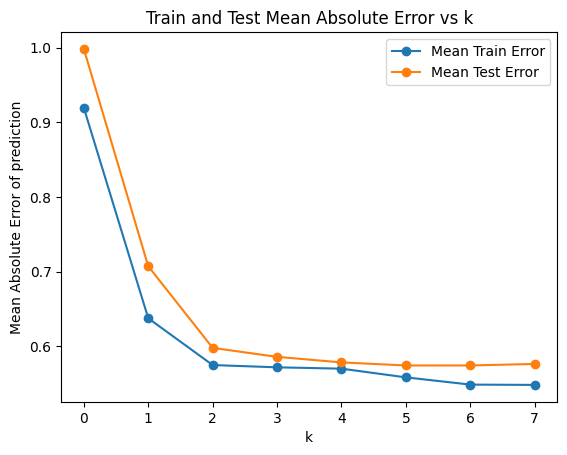

In [19]:
from sklearn.model_selection import train_test_split

train_mean_error = []
test_mean_error = []
print("d)")
for combo in best_combos.values():
    Y = df_enc['lcavol']
    X = df_enc[list(combo[0])]
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42)
    train_X = sm.add_constant(train_X) 
    test_X = sm.add_constant(test_X) 
    model = sm.OLS(train_Y, train_X) 
    results = model.fit() 
    res_train = train_Y - results.get_prediction(train_X).predicted_mean
    train_mean_error.append(np.abs(res_train).mean())
    res_test = test_Y - results.get_prediction(test_X).predicted_mean
    test_mean_error.append(np.abs(res_test).mean())


plt.plot(range(8), train_mean_error, marker='o', label='Mean Train Error')
plt.plot(range(8), test_mean_error, marker='o', label='Mean Test Error') 
plt.xlabel("k") 
plt.ylabel("Mean Absolute Error of prediction") 
plt.title("Train and Test Mean Absolute Error vs k") 
plt.legend()
plt.show()




In [ ]:
list(best_combos.values())

[((), np.float64(133.35903388922304)),
 (('lpsa',), np.float64(61.42090741678992)),
 (('lcp', 'lpsa'), np.float64(47.27809728978648)),
 (('age', 'lcp', 'lpsa'), np.float64(46.237825150928)),
 (('age', 'lbph', 'lcp', 'lpsa'), np.float64(44.87840603234042)),
 (('age', 'lbph', 'lcp', 'pgg45', 'lpsa'), np.float64(44.311332487318964)),
 (('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_8'),
  np.float64(43.77602097098613)),
 (('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9'),
  np.float64(42.47364094908341))]

1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>


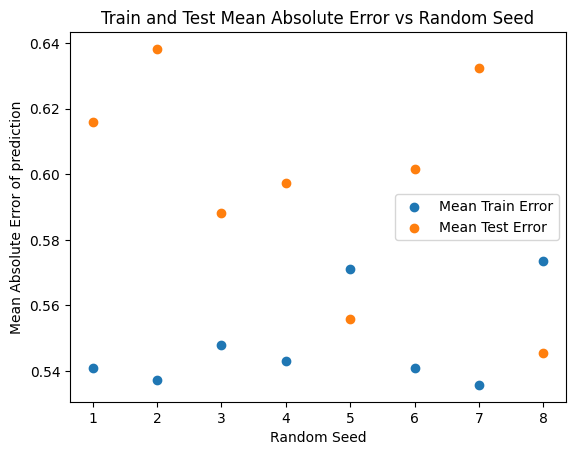

In [20]:
from sklearn.model_selection import train_test_split

train_mean_error = []
test_mean_error = []

seeds = [12, 42, 1005, 89, 23898, 877, 9999, 33]
seeds = [1,2,3,4,5,6,7,8]

combo = list(best_combos[4][0])
for seed in seeds:
    print(seed, type(seed))
    Y = df_enc['lcavol']
    X = df_enc[combo]
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=seed)
    train_X = sm.add_constant(train_X) 
    test_X = sm.add_constant(test_X) 
    model = sm.OLS(train_Y, train_X) 
    results = model.fit() 
    res_train = train_Y - results.get_prediction(train_X).predicted_mean
    train_mean_error.append(np.abs(res_train).mean())
    res_test = test_Y - results.get_prediction(test_X).predicted_mean
    test_mean_error.append(np.abs(res_test).mean())


plt.scatter(seeds, train_mean_error, marker='o', label='Mean Train Error')
plt.scatter(seeds, test_mean_error, marker='o', label='Mean Test Error') 
plt.xlabel("Random Seed") 
plt.ylabel("Mean Absolute Error of prediction") 
plt.title("Train and Test Mean Absolute Error vs Random Seed") 
plt.legend()
plt.show()




On the plot above we can clearly see how the test error can be on different values on the Random Seed. Therefore illustrating how a "lucky split" may loose out on important variance. in these cases can for an example get lower Mean Test Error than the corresponding Train Error.

One solution to this could be to implement K-fold validation. In our implementation we chose 8-fold and then compute an average on these values.

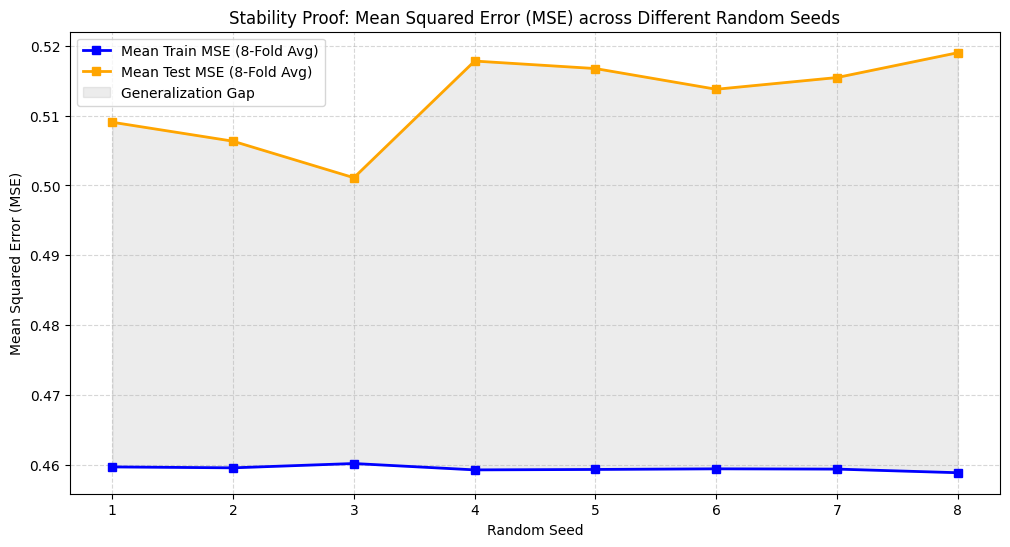

Average Generalization Gap (MSE): 0.0530
Gap Standard Deviation: 0.0062


In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

combo = list(best_combos[4][0])
seeds = [1, 2, 3, 4, 5, 6, 7, 8] 
Y = df_enc['lcavol']
X = df_enc[combo]

seed_train_means = []
seed_test_means = []

for seed in seeds:
    kf = KFold(n_splits=8, shuffle=True, random_state=seed)
    fold_train_errors = []
    fold_test_errors = []
    
    # 8-fold cv
    for train_index, test_index in kf.split(df_enc):
        train_X, test_X = X.iloc[train_index], X.iloc[test_index]
        train_Y, test_Y = Y.iloc[train_index], Y.iloc[test_index]
        
        train_X = sm.add_constant(train_X)
        test_X = sm.add_constant(test_X, has_constant='add')
        
        model = sm.OLS(train_Y, train_X)
        results = model.fit()
        
        # calculate MSE (Squared Error) for this fold
        pred_train = results.predict(train_X)
        fold_train_errors.append(np.mean((train_Y - pred_train)**2))
        
        pred_test = results.predict(test_X)
        fold_test_errors.append(np.mean((test_Y - pred_test)**2))
    
    
    seed_train_means.append(np.mean(fold_train_errors))
    seed_test_means.append(np.mean(fold_test_errors))

plt.figure(figsize=(12, 6))
x_axis = range(1, len(seeds) + 1)

plt.plot(seeds, seed_train_means, marker='s', label='Mean Train MSE (8-Fold Avg)', color='blue', linewidth=2)
plt.plot(seeds, seed_test_means, marker='s', label='Mean Test MSE (8-Fold Avg)', color='orange', linewidth=2)

# shade the gap
plt.fill_between(x_axis, seed_train_means, seed_test_means, color='gray', alpha=0.15, label='Generalization Gap')

plt.title("Stability Proof: Mean Squared Error (MSE) across Different Random Seeds")
plt.xlabel("Random Seed")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(x_axis)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

gen_gap = np.array(seed_test_means) - np.array(seed_train_means)
print(f"Average Generalization Gap (MSE): {np.mean(gen_gap):.4f}")
print(f"Gap Standard Deviation: {np.std(gen_gap):.4f}")

The low standard deviation of 0.0062 indicates that our new implementation mitigates this issue.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.

We see a dramatic improvment in the results when increasing k from 0 until 2. After that both the train and test errors seem to flatten out and there is no point in using a more advanced model with a higher k. In fact it seems only to make the model slightly more prone to overfitting if we compare the test and training losses. 

We could conclude using 8-fold validation that a higher stability could be acheived.This is our preferred model for this reason.